In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

from sklearn.tree import export_graphviz
export_graphviz(tree_clf, out_file="iris_tree.dot", feature_names=iris.feature_names[2:], class_names=iris.target_names,rounded=True, filled=True)

import graphviz
with open("iris_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render("iris_tree", format="png", cleanup=True)



'iris_tree.png'

基尼不纯度：$G_{i}=1-\sum^{n}_{k=1}p_{i,k}^2$

$p_{i,k}$是第$i$个节点中训练实例之间的$k$类实例的比率


In [3]:
tree_clf.predict_proba([[5, 1.5]])
tree_clf.predict([[5, 1.5]])

array([1])

CART训练算法：是一种贪婪算法，从顶层开始搜索最优分裂，然后每层重复这个过程，几层分裂之后，它不会检视这个分裂的不纯度是否为可能的最低值

寻找最优树是一个已知的NP完全问题，需要时间是O(exp(m))

CART分类成本函数： $J(k, t_k) = \frac{m_{\text{left}}}{m} G_{\text{left}} + \frac{m_{\text{right}}}{m} G_{\text{right}}$
    其中               $\begin{cases}
G_{\text{left/right}} & \text{测量左右子集的不纯度} \\
m_{\text{left/right}} & \text{测量左右子集的实例数}
\end{cases}$

熵： $H_i = - \sum_{\substack{k=1 \\ p_{i,k} \neq 0}}^{n} p_{i,k} \log_2(p_{i,k})$



总样本数: 200
各叶节点样本数: [20, 24, 110, 46]
全局目标值均值: 0.354


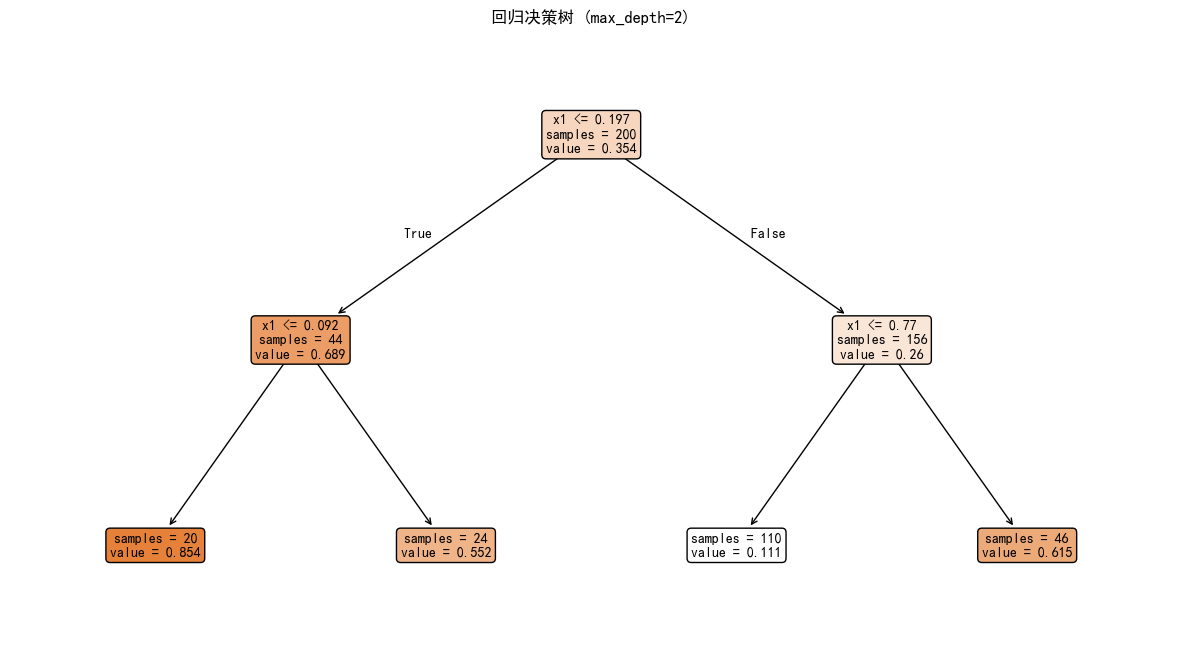

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import DecisionTreeRegressor, plot_tree

# --- 配置中文字体 ---
matplotlib.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'SimSun']
matplotlib.rcParams['axes.unicode_minus'] = False
np.random.seed(42)
x1_leftleft = np.random.uniform(0, 0.092, 20)
y_leftleft = np.full(20, 0.854)
x1_leftright = np.random.uniform(0.092, 0.197, 24)
y_leftright = np.full(24, 0.552)
x1_rightleft = np.random.uniform(0.197, 0.772, 110)
y_rightleft = np.full(110, 0.111)
x1_rightright = np.random.uniform(0.772, 1.0, 46)
y_rightright = np.full(46, 0.615)
X = np.concatenate([x1_leftleft, x1_leftright, x1_rightleft, x1_rightright]).reshape(-1, 1)
y = np.concatenate([y_leftleft, y_leftright, y_rightleft, y_rightright])
print(f"总样本数: {len(X)}")
print(f"各叶节点样本数: [20, 24, 110, 46]")
print(f"全局目标值均值: {np.mean(y):.3f}")

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

plt.figure(figsize=(15, 8))
plot_tree(tree_reg,
          feature_names=['x1'],
          filled=True,
          rounded=True,
          fontsize=10,
          impurity=False,
          proportion=False)
plt.title("回归决策树 (max_depth=2)")
plt.show() # 显示图片

CART回归成本函数： $J(k, t_k) = \frac{m_{\text{left}}}{m} \text{MSE}_{\text{left}} + \frac{m_{\text{right}}}{m} \text{MSE}_{\text{right}}$
其中 $\begin{cases}
\text{MSE}_{\text{node}} = \displaystyle\sum_{i \in \text{node}} (\hat{y}_{\text{node}} - y^{(i)})^2 \\
\hat{y}_{\text{node}} = \dfrac{\displaystyle\sum_{i \in \text{node}} y^{(i)}}{m_{\text{node}}}
\end{cases}$